<a href="https://colab.research.google.com/github/OlajideFemi/Carbon-Footprint/blob/main/Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
all_regions_data = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')

In [ ]:
#all_regions_data_.to_csv('all_regions_data_.csv')

In [ ]:
# Selecting the input features and target variable
X = all_regions_data[['Agriculture Total', 'Area (km2)', 'Commercial Total', 'Domestic Total',
                      'Industry Total', 'LULUCF Net Emissions', 'Per Capita Emissions (tCO2e)',
                      'Population (\'000s, mid-year estimate)', 'Public Sector Total', 'Transport Total',
                      'Waste Management Total']]
y = all_regions_data['Emissions per km2 (kt CO2e)']

X.head(), y.head()


(   Agriculture Total  Area (km2)  Commercial Total  Domestic Total  \
 0          19.579120    642.5864       1553.253161     4693.536163   
 1          74.342545   1474.7211       3601.821682    12364.593312   
 2          27.661103   1092.8705       2295.186992     7289.514848   
 3          10.207251    734.9525       3713.265008     8663.648628   
 4         134.075680   2552.2916       3078.271700    11476.036567   
 
    Industry Total  LULUCF Net Emissions  Per Capita Emissions (tCO2e)  \
 0     3000.433754             43.106696                     82.282843   
 1      898.185721             28.462209                     79.685098   
 2     3191.273950             28.507405                     79.981719   
 3     2611.735053             50.682257                     77.356268   
 4      706.049446           -134.951130                     74.805600   
 
    Population ('000s, mid-year estimate)  Public Sector Total  \
 0                            3276.617269           465.0373

In [ ]:
# Dropping the index column and accessing data using .loc
all_regions_data_cleaned = all_regions_data.drop(columns=['Unnamed: 0'])

# Preparing X and y using .loc to select columns by name
X = all_regions_data_cleaned.loc[:, ['Agriculture Total', 'Area (km2)', 'Commercial Total', 'Domestic Total',
                                     'Industry Total', 'LULUCF Net Emissions', 'Per Capita Emissions (tCO2e)',
                                     'Population (\'000s, mid-year estimate)', 'Public Sector Total',
                                     'Transport Total', 'Waste Management Total']]
y = all_regions_data_cleaned.loc[:, 'Emissions per km2 (kt CO2e)']

X.head()


,Agriculture Total,Area (km2),Commercial Total,Domestic Total,Industry Total,LULUCF Net Emissions,Per Capita Emissions (tCO2e),"Population ('000s, mid-year estimate)",Public Sector Total,Transport Total,Waste Management Total
0,19.579120,642.5864,1553.253161,4693.536163,3000.433754,43.106696,82.282843,3276.617269,465.037323,3213.478824,2475.485206
1,74.342545,1474.7211,3601.821682,12364.593312,898.185721,28.462209,79.685098,6189.282139,1717.304368,7643.282076,2363.286779
2,27.661103,1092.8705,2295.186992,7289.514848,3191.273950,28.507405,79.981719,4004.543634,593.905850,4312.405426,954.044265
3,10.207251,734.9525,3713.265008,8663.648628,2611.735053,50.682257,77.356268,5379.886303,1483.027560,4305.373384,3256.431962
4,134.075680,2552.2916,3078.271700,11476.036567,706.049446,-134.951130,74.805600,5367.002039,1182.362262,5723.306438,1284.718390


In [ ]:
y.head()

0    409.106813
1    330.741682
2    290.768666
3    557.320791
4    156.192098
Name: Emissions per km2 (kt CO2e), dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,Agriculture Total,Area (km2),Commercial Total,Domestic Total,Industry Total,LULUCF Net Emissions,Per Capita Emissions (tCO2e),"Population ('000s, mid-year estimate)",Public Sector Total,Transport Total,Waste Management Total
0,0.000567,0.001309,0.058156,0.146265,0.023057,0.423321,0.008427,0.174551,0.066697,0.115963,0.343259
1,0.002632,0.003158,0.137097,0.388931,0.006840,0.422771,0.007554,0.331546,0.247932,0.277579,0.327658
2,0.000871,0.002310,0.086747,0.228386,0.024530,0.422773,0.007654,0.213787,0.085348,0.156056,0.131707
3,0.000213,0.001514,0.141392,0.271855,0.020059,0.423606,0.006772,0.287919,0.214026,0.155799,0.451848
4,0.004884,0.005553,0.116922,0.360822,0.005357,0.416633,0.005915,0.287225,0.170512,0.207531,0.177686


In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
linear_model = LinearRegression()

# Fit the model to the normalized features and target variable
linear_model.fit(X_scaled_df, y)

# Display the coefficients and intercept of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

coefficients, intercept


(array([ -373.01091153,  -189.78235292,  2377.62911553,  -351.1975132 ,
        -1271.15436804,  -634.10034778,  4952.40629221,  1329.28286493,
         -312.22256109,  -971.6321296 ,   -87.12712731]),
 258.28355870464634)

In [ ]:
# Predicting with the linear model using the normalized features
y_pred = linear_model.predict(X_scaled_df)


y_pred


array([ 1.57348720e+02,  2.71772040e+02,  2.16638078e+02,  3.63204147e+02,
        2.76422712e+02,  7.92557050e+02,  6.37572727e+03,  4.34764789e+02,
        4.11421666e+02,  2.32351503e+02,  2.57324473e+02,  3.34055267e+02,
        4.45364459e+02,  3.03657983e+02,  1.97542278e+02,  1.32874759e+02,
        6.04262268e+02,  5.46085419e+02,  6.14830719e+02,  7.71934132e+02,
        1.79050977e+02,  3.95045598e+02,  2.44279701e+02,  3.24224626e+02,
        4.73539935e+02,  1.60337949e+02,  2.15755635e+02,  7.88850950e+02,
        2.18087276e+02,  1.51866800e+03,  2.08896235e+02,  3.53671908e+02,
        2.34889932e+03,  7.95601054e+01,  5.97651518e+01,  3.11853886e+01,
        7.84619220e+01,  1.29499280e+02,  1.10928565e+02,  9.51363037e+01,
        8.14891403e+01,  1.02879941e+02,  2.48716603e+02,  1.46264472e+02,
        4.89730153e+01,  5.37928659e+01,  7.74604926e+01,  6.66080737e+01,
        4.68889864e+02,  7.44879610e+01,  2.74984445e+02,  1.50675475e+02,
        1.04807336e+02,  

In [ ]:
# Re-importing necessary libraries and re-loading the dataset due to code execution state reset
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv'
all_regions_data = pd.read_csv(file_path)

# Preprocessing
X = all_regions_data[['Agriculture Total', 'Area (km2)', 'Commercial Total', 'Domestic Total',
                      'Industry Total', 'LULUCF Net Emissions', 'Per Capita Emissions (tCO2e)',
                      'Population (\'000s, mid-year estimate)', 'Public Sector Total', 'Transport Total',
                      'Waste Management Total']]

# Normalize the dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Bayesian Information Criterion (BIC)
n_components_range = range(1, 11)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

# Find the number of components with the lowest BIC score
optimal_n_components = n_components_range[bic_scores.index(min(bic_scores))]

# Fit the GMM model with the optimal number of components
gmm_final = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_final.fit(X_scaled)

# Predict the cluster for each data point
clusters = gmm_final.predict(X_scaled)

optimal_n_components, clusters[:5]


(7, array([4, 4, 4, 4, 4]))

In [ ]:
all_regions_data['clusters'] = clusters


In [ ]:
all_regions_data.to_csv('all_regions_data_gmm.csv')

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Load the geographic dataset
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

# Display the first few rows to verify
gdf[['latitude', 'longitude']].head()

,latitude,longitude
0,54.669372,-1.259149
1,54.542036,-1.222284
2,54.551599,-1.020611
3,54.561839,-1.332138
4,54.548745,-1.552677


In [ ]:
gdf.shape

(326, 10)

In [ ]:
all_regions_data.shape


(374, 15)

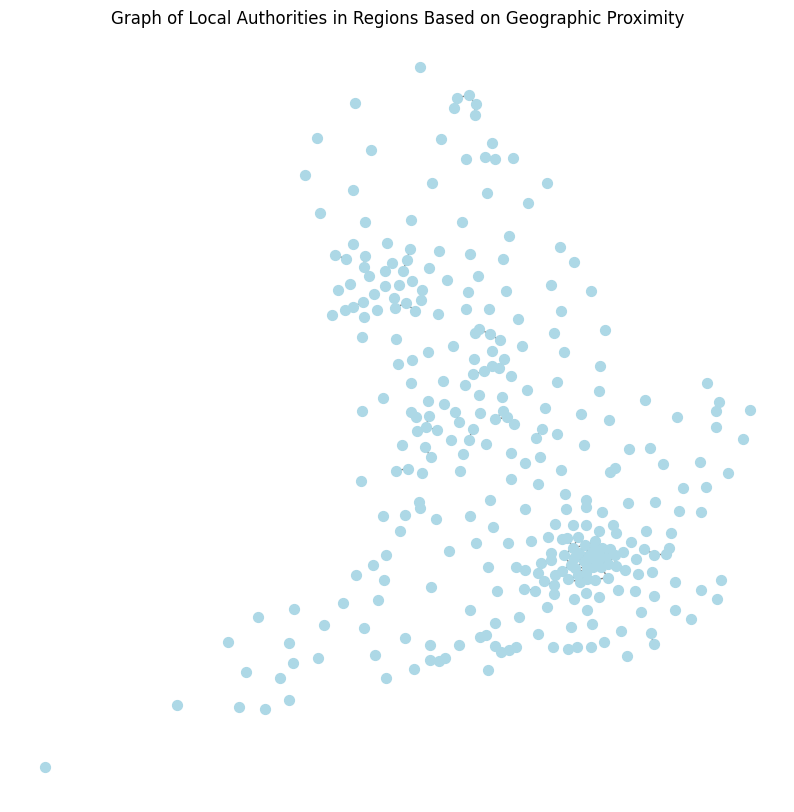

In [ ]:
import pandas as pd

# Load the datasets
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')

all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/all_regions_data_gmm.csv')


# Merge on the 'Local Authority' column to align the datasets
filtered_gdf_ = all_regions_data_.merge(topo_lad_df, left_on='Local Authority', right_on='LAD13NM')

import geopandas as gpd
from shapely import wkt

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

def find_neighbors(gdf, threshold=10):  # Threshold in kilometers
    edges = []
    for index, row in gdf.iterrows():
        lat1, lon1 = row['latitude'], row['longitude']
        for j, candidate_row in gdf.iterrows():
            if index == j:
                continue  # Skip self
            lat2, lon2 = candidate_row['latitude'], candidate_row['longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            if distance <= threshold:
                edges.append((index, j))
    return edges


edges = find_neighbors(gdf, threshold=10)

import networkx as nx

# Initialize an empty graph
G = nx.Graph()

G.add_edges_from(edges)

for index, row in gdf.iterrows():
    G.add_node(index, label=row['LAD13NM'])

import matplotlib.pyplot as plt

# Define positions based on geographic coordinates
pos = {index: (row['longitude'], row['latitude']) for index, row in gdf.iterrows()}

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Geographic Proximity')
plt.show()


In [ ]:
filtered_gdf_.head()


,Unnamed: 0.1,Unnamed: 0_x,Local Authority,Agriculture Total,Area (km2),Commercial Total,Domestic Total,Emissions per km2 (kt CO2e),Industry Total,LULUCF Net Emissions,...,Transport Total,Waste Management Total,clusters,Unnamed: 0_y,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,0,0,Barking and Dagenham,19.579120,642.5864,1553.253161,4693.536163,409.106813,3000.433754,43.106696,...,3213.478824,2475.485206,4,294,E09000002,E09000002,00AB,Barking and Dagenham,NaN,MULTIPOLYGON (((0.0732729823768476 51.52929156...
1,1,1,Barnet,74.342545,1474.7211,3601.821682,12364.593312,330.741682,898.185721,28.462209,...,7643.282076,2363.286779,4,295,E09000003,E09000003,00AC,Barnet,NaN,POLYGON ((-0.1820144777395294 51.6684494255825...
2,2,2,Bexley,27.661103,1092.8705,2295.186992,7289.514848,290.768666,3191.273950,28.507405,...,4312.405426,954.044265,4,296,E09000004,E09000004,00AD,Bexley,NaN,MULTIPOLYGON (((0.1992802543573671 51.45852325...
3,3,3,Brent,10.207251,734.9525,3713.265008,8663.648628,557.320791,2611.735053,50.682257,...,4305.373384,3256.431962,4,297,E09000005,E09000005,00AE,Brent,NaN,POLYGON ((-0.2671102977783217 51.6006545703714...
4,4,4,Bromley,134.075680,2552.2916,3078.271700,11476.036567,156.192098,706.049446,-134.951130,...,5723.306438,1284.718390,4,298,E09000006,E09000006,00AF,Bromley,NaN,POLYGON ((0.0757276694933511 51.43176212405591...


In [ ]:
#Count number of distinct elements in specified axis.
filtered_gdf_['clusters'].nunique()

7

In [ ]:
unique_clusters = filtered_gdf_['clusters'].unique()
unique_clusters

array([4, 0, 2, 1, 6, 3, 5])

In [ ]:
# Manually define a color for each cluster
cluster_colors = {
    0: 'cyan',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange'
}


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming 'G' is your graph and 'filtered_gdf_' contains the cluster assignments
# Add cluster info to each node in G
for index, row in filtered_gdf_.iterrows():
    G.nodes[index]['cluster'] = row['clusters']

# Generate a color map based on the cluster assignments
# Assuming a maximum of 'n' clusters, adjust 'n' as necessary
# n = filtered_gdf_['clusters'].nunique()
# color_map = plt.cm.get_cmap('viridis', n)
# node_colors = [color_map(G.nodes[node]['cluster']) for node in G.nodes()]

# Modified part to assign colors to nodes based on their cluster, with a fallback color
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node].get('cluster')  # Use .get() to avoid KeyError
    if cluster is not None and cluster in cluster_colors:
        node_colors.append(cluster_colors[cluster])
    else:
        node_colors.append('grey')  # Fallback color if cluster data is missing

# Draw the graph with node colors based on clusters
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on  GMM Clusters')
plt.show()


NameError: name 'cluster_colors' is not defined

In [ ]:
# Modified part to assign colors to nodes based on their cluster, with a fallback color
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node].get('cluster')  # Use .get() to avoid KeyError
    if cluster is not None and cluster in cluster_colors:
        node_colors.append(cluster_colors[cluster])
    else:
        node_colors.append('grey')  # Fallback color if cluster data is missing

# Draw the graph with node colors based on clusters
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on  GMM Clusters')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Manually define a color for each cluster
cluster_colors = {
    0: 'cyan',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange'
}

# Add cluster info to each node in G (assuming this step is needed)
for index, row in filtered_gdf_.iterrows():
    if G.has_node(index):  # Ensure the node exists in the graph
        G.nodes[index]['cluster'] = row['clusters']

# Assign colors to nodes based on their cluster
#node_colors = [cluster_colors[G.nodes[node]['cluster']] for node in G.nodes()]
# Modified part to assign colors to nodes based on their cluster, with a fallback color
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node].get('cluster')  # Use .get() to avoid KeyError
    if cluster is not None and cluster in cluster_colors:
        node_colors.append(cluster_colors[cluster])
    else:
        node_colors.append('grey')  # Fallback color if cluster data is missing

# Draw the graph with node colors based on clusters
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color='black', width=1)
plt.title('Graph of Local Authorities in Regions Based on GMM Clusters')
plt.show()


In [ ]:
# Modified part to assign colors to nodes based on their cluster, with a fallback color
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node].get('cluster')  # Use .get() to avoid KeyError
    if cluster is not None and cluster in cluster_colors:
        node_colors.append(cluster_colors[cluster])
    else:
        node_colors.append('grey')  # Fallback color if cluster data is missing

# Draw the graph with node colors based on clusters
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Clusters')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Manually define a color for each cluster
cluster_colors = {
    0: 'cyan',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange'
}

# Add cluster info to each node in G (assuming this step is needed)
for index, row in filtered_gdf_.iterrows():
    if G.has_node(index):  # Ensure the node exists in the graph
        G.nodes[index]['cluster'] = row['clusters']

# Assign colors to nodes based on their cluster
#node_colors = [cluster_colors[G.nodes[node]['cluster']] for node in G.nodes()]
# Modified part to assign colors to nodes based on their cluster, with a fallback color
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node].get('cluster')  # Use .get() to avoid KeyError
    if cluster is not None and cluster in cluster_colors:
        node_colors.append(cluster_colors[cluster])
    else:
        node_colors.append('grey')  # Fallback color if cluster data is missing

# Draw the graph with node colors based on clusters
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Clusters')
plt.show()


In [ ]:
# High-contrast colors for clusters
cluster_colors = {
    0: 'cyan',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange'
}

# Add cluster info to each node in G
for index, row in filtered_gdf_.iterrows():
    if G.has_node(index):
        G.nodes[index]['cluster'] = row['clusters']

# Assign colors to nodes based on their cluster
node_colors = [cluster_colors.get(G.nodes[node].get('cluster', None), 'grey') for node in G.nodes()]

# Define a single color for all edges for simplicity, or create a logic to color them differently
edge_color = 'black'  # A color that stands out against the node colors and the background

# Now draw the graph with the specified node and edge colors
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, ax=ax, node_size=50, node_color=node_colors, edge_color=edge_color, width=1)
plt.title('Graph of Local Authorities in Regions Based on Clusters')
plt.show()


In [ ]:

degree_centrality = nx.degree_centrality(G)

sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

betweenness_centrality = nx.betweenness_centrality(G)

sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

print("Top 5 nodes by degree centrality:")
for node, centrality in sorted_degree_centrality[:5]:
    print(f"Node {node}: {centrality}")

print("\nTop 5 nodes by betweenness centrality:")
for node, centrality in sorted_betweenness_centrality[:5]:
    print(f"Node {node}: {centrality}")




In [ ]:

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)

top_level_communities = next(communities_generator)

communities = sorted(map(sorted, top_level_communities))

for i, community in enumerate(communities):
    print(f"Community {i}: {community}")


In [ ]:
pip install python-louvain

In [ ]:
import pandas as pd

# Load the datasets
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')

# Merge on the 'Local Authority' column to align the datasets
filtered_gdf_ = all_regions_data_.merge(topo_lad_df, left_on='Local Authority', right_on='LAD13NM')

import geopandas as gpd
from shapely import wkt

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

def find_neighbors(gdf, threshold=10):  # Threshold in kilometers
    edges = []
    for index, row in gdf.iterrows():
        lat1, lon1 = row['latitude'], row['longitude']
        for j, candidate_row in gdf.iterrows():
            if index == j:
                continue  # Skip self
            lat2, lon2 = candidate_row['latitude'], candidate_row['longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            if distance <= threshold:
                edges.append((index, j))
    return edges


edges = find_neighbors(gdf, threshold=10)

import networkx as nx

# Initialize an empty graph
G = nx.Graph()

G.add_edges_from(edges)

for index, row in gdf.iterrows():
    G.add_node(index, label=row['LAD13NM'])

import matplotlib.pyplot as plt

# Define positions based on geographic coordinates
pos = {index: (row['longitude'], row['latitude']) for index, row in gdf.iterrows()}

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Geographic Proximity')
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the geographic dataset
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x


In [ ]:


#import community as community_louvain
import networkx as nx
from community.community_louvain import best_partition
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.graph_objects as go


# Now, use the best_partition function directly
partition = best_partition(G)

# Create a colormap
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

fig = go.Figure()

# Add nodes to the map, colored by their community
for index, (node, community) in enumerate(partition.items()):
    row = gdf.iloc[node]
    fig.add_trace(go.Scattermapbox(
        lat=[row['latitude']],
        lon=[row['longitude']],
        mode='markers',
        marker=go.scattermapbox.Marker(size=9, color=cmap(community)),
        text=row['LAD13NM'],  # Adjust if using a different label
        hoverinfo='text'
    ))



# Update the layout of the map (reuse your existing map settings)
fig.update_layout(
    mapbox=dict(
        accesstoken='pk.eyJ1Ijoib2xhamlkZWZlbWkiLCJhIjoiY2xzaXkybDBxMHF5dTJscG5nMzh6aW1udCJ9.RhwlWVHMNI3H1TtUtX6iYQ',
        zoom=5,
        center=dict(
            lat=gdf['latitude'].mean(),
            lon=gdf['longitude'].mean()
        ),
        style='mapbox://styles/mapbox/light-v10'
    ),
    showlegend=False,
    margin=dict(l=0, r=0, t=0, b=0)
)

# Show the figure
fig.show()
